In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [220]:
raw_data = pd.read_csv('data/covid_19_data.csv')
raw_data['ObservationDate'] = pd.to_datetime(raw_data['ObservationDate'], format='%m/%d/%Y')
time_series_per_country = raw_data.groupby(['Country/Region', 'ObservationDate']).agg(
    {'Confirmed':sum, 'Deaths': sum, 'Recovered': sum}
)


def get_SIR_data(country_name, n=1):
    filtered_df = time_series_per_country.iloc[time_series_per_country.index.get_level_values('Country/Region') == country_name]
    filtered_df = filtered_df.reset_index(level=0, drop=True) # remove country's name from index
    filtered_df['R'] = (filtered_df.pop('Deaths') + filtered_df.pop('Recovered')) / n
    filtered_df['I'] = filtered_df.pop('Confirmed') / n - filtered_df['R']
    return filtered_df


def plot_SIR_data(country_name, n=1):
    SIR_data = get_SIR_data(country_name, n=n)
    SIR_data.plot(title=country_name)


def get_params(country_name, n):
    SIR_data = get_SIR_data(country_name, n=n)
    params = pd.DataFrame(index=SIR_data.index, columns=['beta', 'gamma', 'R0'])
    for i, (index, row) in enumerate(SIR_data.iterrows()):
        if i == len(SIR_data)-1: # boundary conditions
            params['gamma'][i] = params['gamma'][i-1]
            params['beta'][i] = params['beta'][i-1]
        else:
            SIR_data['R']
            nextR = SIR_data['R'][i+1]
            nextI = SIR_data['I'][i+1]
            params['gamma'][i] = (nextR - row['R']) / row['I']
            # n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
            params['beta'][i] = ((nextI - row['I']) + (nextR - row['R'])) / row['I'] * (1-row['I']-row['R'])
            if params['gamma'][i] != 0:
                params['R0'][i] = params['beta'][i] / max(params['gamma'])
    return params

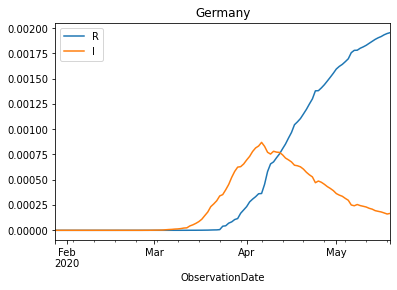

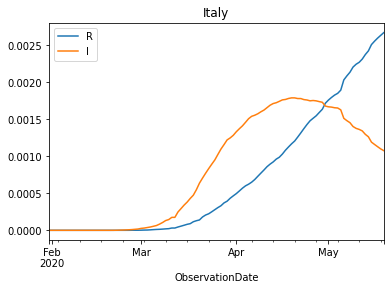

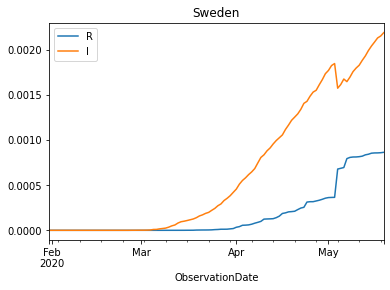

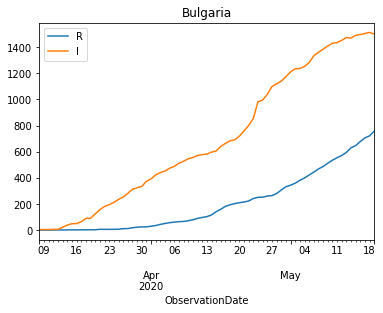

In [249]:
plot_SIR_data('Germany', n=83754192)
plot_SIR_data('Italy', n=60461826)
plot_SIR_data('Sweden', n=10099265)
plot_SIR_data('Bulgaria')

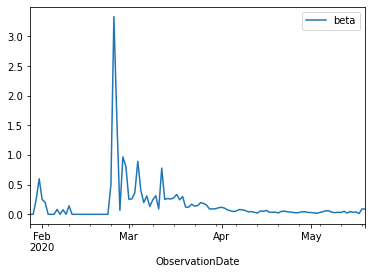

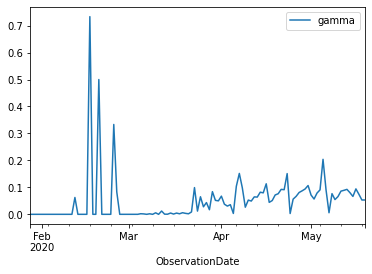

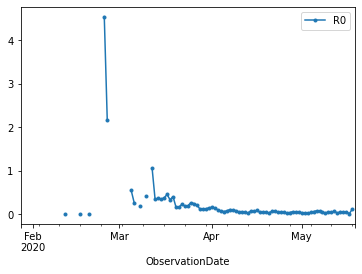

In [228]:
params = get_params('Germany', 83754192)#('Italy', n=60461826)#('Germany', 83754192)#('Bulgaria', 7000000)#('Sweden', n=10099265)
params.plot(y='beta')
params.plot(y='gamma')
params.plot(y='R0',style='.-')

In [179]:
params['beta']

ObservationDate
2020-01-28            0
2020-01-29            0
2020-01-30         0.25
2020-01-31          0.6
2020-02-01         0.25
                ...    
2020-05-15    0.0329064
2020-05-16    0.0404697
2020-05-17    0.0126158
2020-05-18    0.0906503
2020-05-19    0.0906503
Name: beta, Length: 113, dtype: object

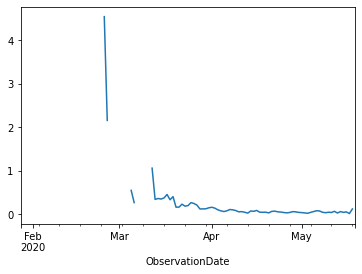

In [230]:
params['R0'].interpolate(method='polynomial', order=3).plot()

In [242]:
data = get_SIR_data('Germany')
#data['I'].interpolate(method='spline', order=3).plot()

In [1]:
type(data['R'])

NameError: name 'data' is not defined

In [247]:
"""[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 12.0,
 12.0,
 12.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 18.0,
 18.0,
 20.0,
 20.0,
 28.0,
 28.0,
 53.0,
 55.0,
 57.0,
 84.0,
 91.0,
 133.0,
 157.0,
 247.0,
 317.0,
 360.0,
 576.0,
 3400.0,
 3753.0,
 5940.0,
 7000.0,
 8914.0,
 9744.0,
 14145.0,
 16875.0,
 19620.0,
 23547.0,
 25850.0,
 27844.0,
 30284.0,
 30510.0,
 38097.0,
 48649.0,
 55014.0,
 56680.0,
 60136.0,
 63322.0,
 67494.0,
 71494.0,
 76404.0,
 81052.0,
 87466.0,
 89859.0,
 92586.0,
 96362.0,
 100233.0,
 104679.0,
 108875.0,
 115560.0,
 115677.0,
 117976.0,
 120626.0,
 123714.0,
 126867.0,
 130123.0,
 133636.0,
 135812.0,
 137466.0,
 139693.0,
 142093.0,
 147175.0,
 149092.0,
 149210.0,
 150849.0,
 151969.0,
 153278.0,
 154938.0,
 156561.0,
 158184.0,
 159494.0,
 160538.0,
 161973.0,
 163044.0,
 163762.0]""".replace('\n', '')

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 12.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 20.0, 20.0, 28.0, 28.0, 53.0, 55.0, 57.0, 84.0, 91.0, 133.0, 157.0, 247.0, 317.0, 360.0, 576.0, 3400.0, 3753.0, 5940.0, 7000.0, 8914.0, 9744.0, 14145.0, 16875.0, 19620.0, 23547.0, 25850.0, 27844.0, 30284.0, 30510.0, 38097.0, 48649.0, 55014.0, 56680.0, 60136.0, 63322.0, 67494.0, 71494.0, 76404.0, 81052.0, 87466.0, 89859.0, 92586.0, 96362.0, 100233.0, 104679.0, 108875.0, 115560.0, 115677.0, 117976.0, 120626.0, 123714.0, 126867.0, 130123.0, 133636.0, 135812.0, 137466.0, 139693.0, 142093.0, 147175.0, 149092.0, 149210.0, 150849.0, 151969.0, 153278.0, 154938.0, 156561.0, 158184.0, 159494.0, 160538.0, 161973.0, 163044.0, 163762.0]'